# DFS & DFT

The discrete Fourier transform (DFT) of a signal is defined using the following formula:

$$X[k]=\sum_{n=0}^{N-1} x[n] e^{-j(2\pi/N)(n)(k)}, \quad n,k=0,\ldots,N-1$$

Similar formula is used for the discrete Fourier series (DFS) of a periodic signal.
The DFS / DFT is a vector of complex numbers which can be represented via their magnitude and phase

### Transformation matrix

DFS / DFT can be easily implemented using the transform matrix $W_N$. We recall that for a signal of length $N$ the transform matrix has as $n$-th row and $k$-th column element $W_N(n,k)=e^{−j(2π/N)(n k)}=W^{(n)(k)}_N$, with $n,k=0,…,N−1$,  and there we denote $W_N=e^{−j(2π/N)}$.

In Python, a DFT matrix can be generated using the following code.

In [1]:
def dftmatrix(N):
    '''construct DFT matrix'''
    import numpy as np
    
    # create a 1xN matrix containing indices 0 to N-1
    a = np.expand_dims(np.arange(N), 0)
    
    # take advantage of numpy broadcasting to create the matrix
    WN = np.exp(-2j*np.pi*a.T*a/N)  # El truco está en el producto externo para crear la matriz de índices: nk
    
    return WN

The transformation $X[k]$ of the signal $x[n]$ is then given by $X = Wx$.

In [2]:
%pylab inline
N = 6
WN = dftmatrix(N)

x = np.ones(N)
X = np.dot(WN, x)

Populating the interactive namespace from numpy and matplotlib


The inverse transformation
$$ x(n)=\frac{1}{N} \sum_{k=1}^{N} X[k] e^{j(2\pi/N)(n)(k)} $$


In [3]:
x2 = 1./N * np.dot(WN.T.conjugate(), X)
print('Error: ',(np.abs(x - x2).sum()))
print('(This small error is due to machine precision.)')

Error:  5.2944039651e-15
(This small error is due to machine precision.)


###Magnitude and Phase

Let's start with a simple signal: unitary step function (periodic) of length N=128...

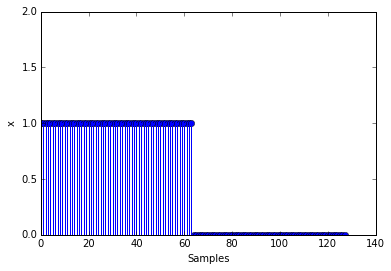

(<matplotlib.text.Text at 0x6c74860>,
 None)

In [4]:
x = np.append(np.ones(64),np.zeros(64))
y = np.linspace(0,127,128)
# The plotting is done by the pylab.stem function
stem(y,x), ylim([0,2])
xlabel('Samples'), ylabel('x'), show()

The transformation matrix and the transform is then

In [5]:
x = x.flatten();    # I don't get why the flatten command is necessary
N = 128
W128 = dftmatrix(N)
X  = np.dot(W128,x)

The stem plot of the magnitude (absolute value), and phase (angle) of the DSF or DFT

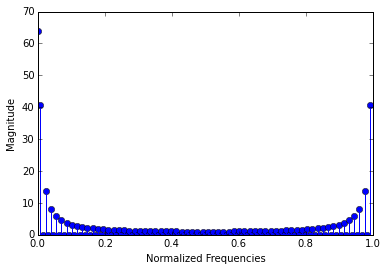

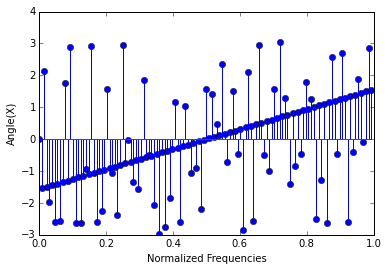

In [6]:
Xmag = abs(X)
Xphase = np.angle(X)

y = np.linspace(0,127,128)
y[:] = y[:]/len(y) #we are normalizing the frequencies
# Plotting is done by the pylab.stem function
stem(y,Xmag)
ylabel('Magnitude'), xlabel('Normalized Frequencies')
show()

stem(y,Xphase)
ylabel('Angle(X)'), xlabel('Normalized Frequencies')
show()

### Numerical intermezzo

It is important to notice that, when the phase is close to $k\pi$ with $k=0,1,2,…$, its computation is extremely sensitive to numerical errors. 
Consider for instance the third coefficient $X[3]$ of the DFT / DFS of the step function.
If we theoretically compute such value, by remarking that is a geometric series $X[3]=\sum_{n=1}^{N/2} a^n$ with $a=e^{-j(2\pi/N)(n-1)(3-1)}$ we obtain $X[3]=\frac{1-e^{-j(2\pi/N)2 N/2 }}{1-e^{-j(2\pi/N)2}}= 0$ i.e. a complex number with zero imaginary part, that by definition has an angle of zero.
If we numerically compute such value:

In [7]:
X[2] = sum(W128[2])
print(X[2])
print(np.angle(X[2]))

(-2.22044604925e-15-1.47104550763e-15j)
-2.55648021541


Notice that the theoretical phase of $X$ is

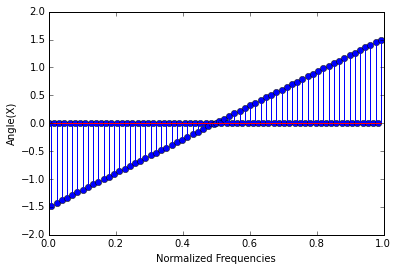

In [8]:
Theoretical_phase = np.linspace(-1.5,1.5,128)  # 
Theoretical_phase[0:127:2] = 0                 # odd terms phase is zero
stem(y,Theoretical_phase)
ylabel('Angle(X)'), xlabel('Normalized Frequencies')
xlim([0,1]), ylim([-2,2])
show()

The inverse transformation, is:

In [9]:
x_inv = np.dot(np.conjugate(W128),X) *1/128

Which actually has real and imaginary parts, once again, by numerical errors. We shall therefore force the result to be real using the command np.real()

In [10]:
print('real part has a magnitude:', np.dot(x_inv.real,x_inv.real))
print('imag part has a magnitude:', np.dot(x_inv.imag,x_inv.imag))

real part has a magnitude: 64.0
imag part has a magnitude: 1.32325500293e-26


In [11]:
xx = np.real(x_inv)

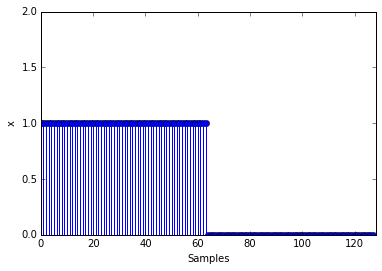

In [12]:
stem(np.arange(xx.size),xx)
ylim([0,2]), xlim([0,128])
ylabel('x'), xlabel('Samples')
show()

## The Role of the Fourier transform

Load the file frequencyRepresentation.mat. The signal $x$ contained in the file is a sum of sinusoids, that is, is a sound composed of different tones. We would like to understand how many tones or sinusoids compose the signal.

In [13]:
import scipy.io
mat = scipy.io.loadmat('D:/TrabajoSwIng/Python/IPython Notebooks/DSPNumex_EPFL/NumEx4/frequencyRepresentation.mat')
print(mat)

signal = mat['x'] # WTF this means?
print(signal)
type(signal)
print(np.shape(signal))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Dec 19 14:17:23 2012', 'x': array([[  7.30443561e-01,   1.32608160e+00,   1.68257383e+00, ...,
         -1.32608160e+00,  -7.30443561e-01,  -2.93915232e-14]]), '__version__': '1.0', '__globals__': []}
[[  7.30443561e-01   1.32608160e+00   1.68257383e+00 ...,  -1.32608160e+00
   -7.30443561e-01  -2.93915232e-14]]
(1, 4000)


In the time domain we can either visualize the signal using a basic plot function (the figure below only displays 500 samples out of the 4000),

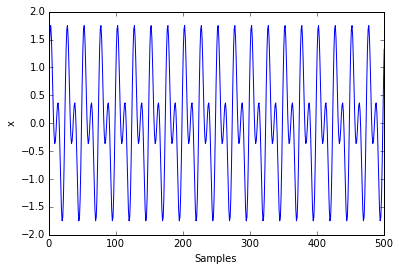

In [14]:
signal = signal.reshape(signal.size,)
plot(np.arange(signal.size),signal)   # arange creates vectors as row matrices
xlim([0,500])
xlabel('Samples'), ylabel('x')
show()

Let's now take a look at the DFS /DFT. Once created, the transformation matrix (here N=4000)

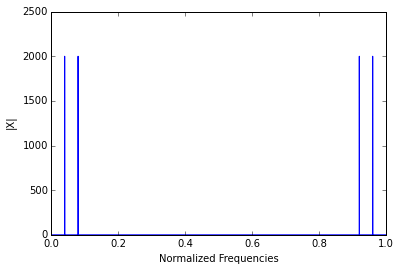

In [15]:
signal = signal.reshape(signal.size,1)
W = dftmatrix(len(signal))
X = np.dot(W,signal)

# The stem plot in normalized frequencies yields:
normFrequ = np.arange(1,X.size+1,dtype=float)/float(X.size)
plot(normFrequ,abs(X))
ylabel('|X|'), xlabel('Normalized Frequencies')
show()